In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
results = pd.read_csv('evaluation_results.csv')
# get unique models
models = results['model'].unique()
# get unique datasets
datasets = results['dataset'].unique()




In [15]:
# Calculate average PSNR, MSE, and SSIM for each model and dataset
avg_metrics = results.groupby(['model', 'dataset'])[['compression_ratio', 'compression_factor','psnr', 'mse', 'ssim']].mean().reset_index()
#show the dataframe with pandas
print(avg_metrics)

# Save the average metrics to a new CSV file
avg_metrics.to_csv('average_metrics.csv', index=False)  



         model       dataset  compression_ratio  compression_factor      psnr  \
0   fake_model  EMPIAR-12592                1.0                 1.0  20.78321   
1  fake_model2  EMPIAR-12592                1.0                 1.0  20.78321   

         mse      ssim  
0  91.931022  0.640745  
1  91.931022  0.640745  


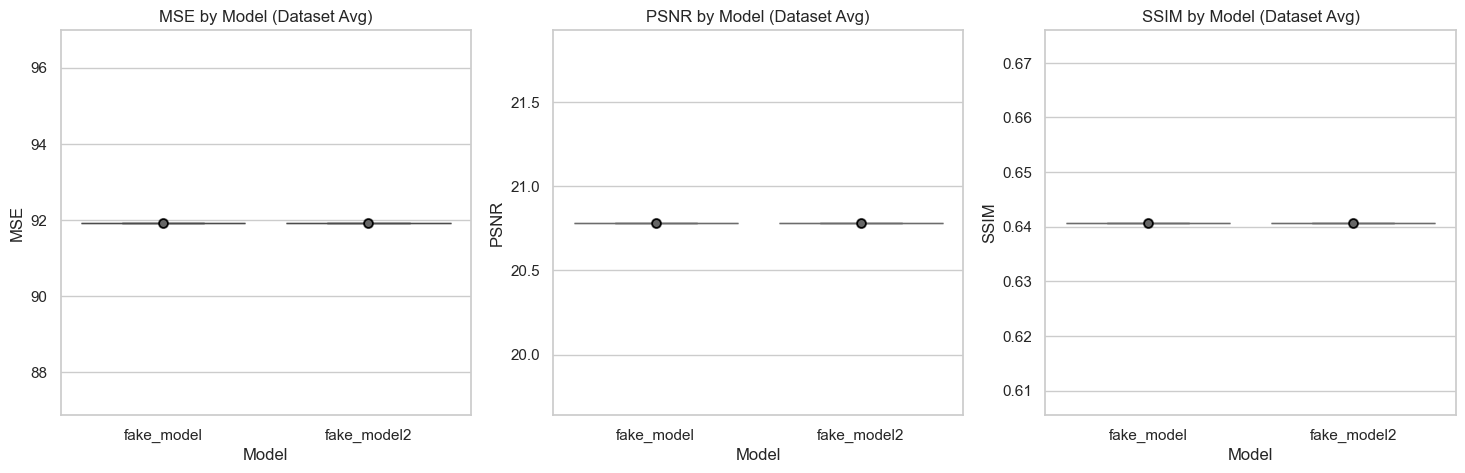

In [ ]:
# Calculate dataset-level averages for each model
dataset_avg = results.groupby(['model', 'dataset'])[['mse', 'psnr', 'ssim']].mean().reset_index()

metrics = ['mse', 'psnr', 'ssim']


#same plots using seaborn and with distinct colors for each model
plt.figure(figsize=(18, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='model', y=metric, data=dataset_avg, showmeans=True, 
                meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
                boxprops=dict(alpha=.7), palette='Set2')


    sns.stripplot(x='model', y=metric, data=dataset_avg, color='black', size=8, jitter=True, alpha=0.6)
    plt.title(f'{metric.upper()} by Model (Dataset Avg)')
    plt.xlabel('Model')
    plt.ylabel(metric.upper())
plt.tight_layout()
plt.savefig('dataset_avg_metrics.png', dpi=300)

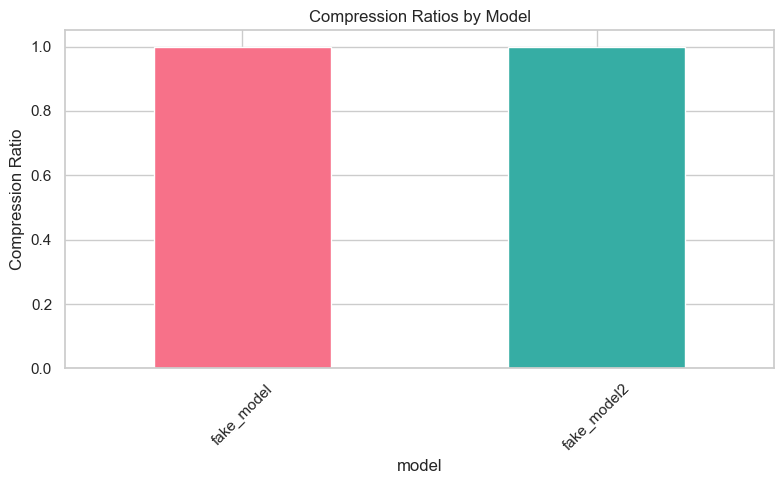

In [ ]:
# Plot compression ratios for each model

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
compression_ratios = avg_metrics.groupby('model')['compression_ratio'].first()
compression_ratios.plot(kind='bar', color=sns.color_palette("husl", len(compression_ratios)))
plt.ylabel('Compression Ratio')
plt.title('Compression Ratios by Model')
plt.xticks(rotation=45) 
plt.tight_layout()
compression_bpps = avg_metrics.groupby('model')['bpp'].mean()
compression_bpps.plot(kind='bar', color=sns.color_palette("husl", len(compression_bpps)))
plt.ylabel('Bitrate (bpp)')
plt.title('Bitrate by Model')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()
